<a href="https://colab.research.google.com/github/Rayley001/DATA205/blob/main/Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Crime, Home Value, and School Exposure: Insights from a Spatial Analysis of Montgomery County**

*Exploring crime trends and their effects on communities across Montgomery County*



This section of the analysis focuses on exploring the relationships between crime, housing, and school environments in Montgomery County using Python. After preparing and cleaning the data in OpenRefine and R, Python was used to conduct statistical tests, create interactive maps, and perform spatial proximity analysis. Techniques such as t-tests, correlation calculations, and geographic heatmaps were applied to investigate how specific types of crime relate to median home values and how public schools differ in their exposure to nearby criminal activity. The following analysis provides both statistical evidence and visual representations to support key findings and uncover patterns that may not be immediately visible in raw data tables.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
folder_path = '/content/drive/MyDrive/DATA_205Crime Project/'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Upload my datasets

In [ ]:

crime_df = pd.read_csv('/content/drive/MyDrive/DATA_205Crime Project/crime_select.csv')
crime_df.head()

dispatchdate/time      start_date_time           end_date_time  \
0  01/09/2022 01:18:38 AM  2022-01-09 01:34:00                     NaN   
1  01/28/2022 07:11:29 PM  2022-01-28 14:40:00  01/28/2022 02:46:00 PM   
2  02/08/2022 05:42:51 AM  2022-02-08 05:42:00                     NaN   
3  07/28/2020 02:55:00 PM  2020-07-28 14:54:00  07/28/2020 03:00:00 PM   
4  01/30/2019 07:49:25 PM  2019-01-30 19:49:00                     NaN   

   victims              crimename1                                crimename2  \
0        1   Crime Against Society               Driving Under the Influence   
1        1  Crime Against Property  Destruction/Damage/Vandalism of Property   
2        1  Crime Against Property                                   Robbery   
3        1  Crime Against Property            Burglary/Breaking and Entering   
4        1  Crime Against Property            Burglary/Breaking and Entering   

                               crimename3  policedistrictname           city  \
0      DRIVING UNDER THE INFLUENCE LIQUOR  MONTGOMERY VILLAGE   gaithersburg   
1              DAMAGE PROPERTY - BUSINESS  MONTGOMERY VILLAGE   gaithersburg   
2                    ROBBERY - STREET-GUN       SILVER SPRING  silver spring   
3  BURGLARY - NO FORCED ENTRY-RESIDENTIAL            BETHESDA       bethesda   
4  BURGLARY - NO FORCED ENTRY-RESIDENTIAL       SILVER SPRING  silver spring   

   zipcode agency                        place  latitude  longitude  \
0  20877.0    GPD          Street - In vehicle  39.09438   -77.1517   
1  20879.0    GPD               Retail - Other  39.16059   -77.2209   
2  20910.0   MCPD     Parking Lot - Commercial  38.99021   -77.0239   
3  20817.0   MCPD    Residence - Single Family  39.00414   -77.1783   
4  20904.0   MCPD  Residence - Apartment/Condo  39.04120   -76.9862   

  policedistrictnumber               location        Date  year  month  hour  
0                   6D  "(39.0944, -77.1517)"  2022-01-09  2022      1     1  
1                   6D  "(39.1606, -77.2209)"  2022-01-28  2022      1    14  
2                   3D  "(38.9902, -77.0239)"  2022-02-08  2022      2     5  
3                   2D  "(39.0041, -77.1783)"  2020-07-28  2020      7    14  
4                   3D  "(39.0412, -76.9862)"  2019-01-30  2019      1    19

In [ ]:
# Group by year and crime type
crime_by_year = crime_df.groupby(['year', 'crimename1']).size().unstack()
print(crime_by_year)

crimename1  Crime Against Not a Crime  Crime Against Person  \
year                                                          
2017                              459                  3428   
2018                              591                  4773   
2019                              622                  4754   
2020                              511                  4298   
2021                              431                  4953   
2022                              617                  5405   
2023                              493                  5616   
2024                              532                  5275   

crimename1  Crime Against Property  Crime Against Society  
year                                                       
2017                         17007                  18258  
2018                         20559                  25283  
2019                         21504                  22507  
2020                         22674                  16668  
2021     

<ipython-input-8-d7a065f7b4c3>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='crime_percentage', y='city', data=crime_by_city, palette='viridis')


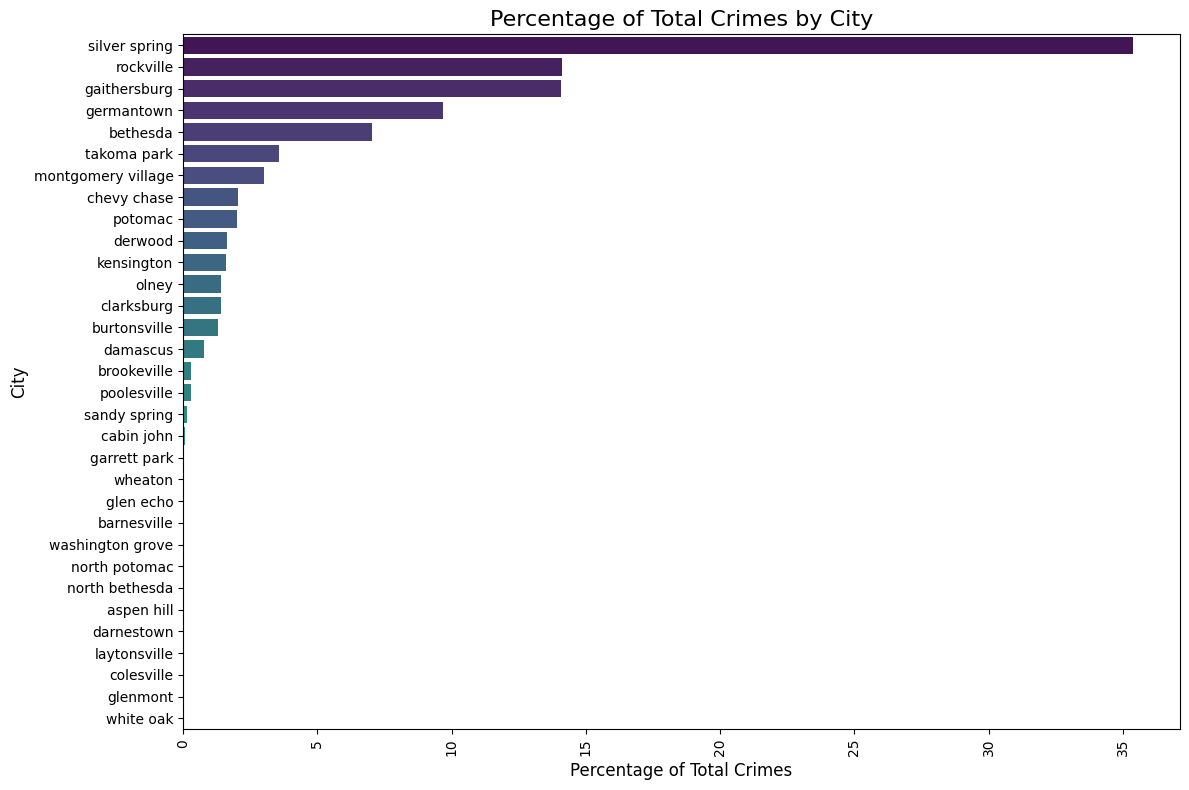

In [ ]:

# Group by city and count crimes
crime_by_city = crime_df.groupby('city').size().reset_index(name='crime_count')

# Calculate the total number of crimes
total_crimes = crime_by_city['crime_count'].sum()

# Calculate the percentage of total crimes for each city
crime_by_city['crime_percentage'] = (crime_by_city['crime_count'] / total_crimes) * 100

# Sort the cities by crime percentage in descending order
crime_by_city = crime_by_city.sort_values(by='crime_percentage', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='crime_percentage', y='city', data=crime_by_city, palette='viridis')

# Set plot labels and title
plt.title('Percentage of Total Crimes by City', fontsize=16)
plt.xlabel('Percentage of Total Crimes', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.xticks(rotation=90)  # Rotate city names for readability

# Show the plot
plt.tight_layout()
plt.show()

<ipython-input-9-c9b06c55de9e>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='crime_percentage', y='policedistrictname', data=crime_by_district_full, palette='viridis')


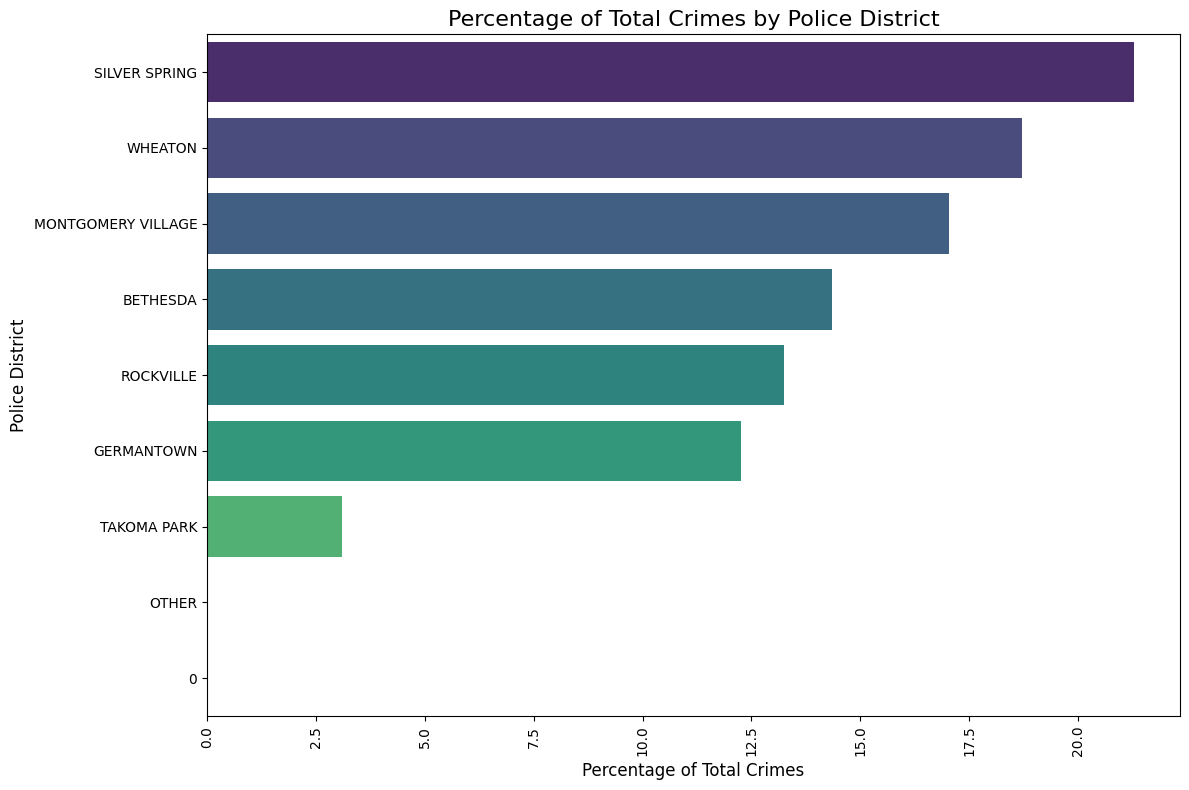

In [ ]:
# Group by police district and count crimes
crime_by_district = crime_df.groupby('policedistrictname').size().reset_index(name='crime_count')

# Create a list of all unique police districts (even those with no crimes recorded)
all_districts = crime_df['policedistrictname'].unique()

# Convert the list of all police districts into a DataFrame
all_districts_df = pd.DataFrame(all_districts, columns=['policedistrictname'])

# Merge the list of all police districts with the crime data, filling missing districts with zero crime count
crime_by_district_full = pd.merge(all_districts_df, crime_by_district, on='policedistrictname', how='left').fillna(0)

# Calculate the total number of crimes
total_crimes = crime_by_district_full['crime_count'].sum()

# Calculate the percentage of total crimes for each police district
crime_by_district_full['crime_percentage'] = (crime_by_district_full['crime_count'] / total_crimes) * 100

# Sort the districts by crime percentage in descending order
crime_by_district_full = crime_by_district_full.sort_values(by='crime_percentage', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='crime_percentage', y='policedistrictname', data=crime_by_district_full, palette='viridis')

# Set plot labels and title
plt.title('Percentage of Total Crimes by Police District', fontsize=16)
plt.xlabel('Percentage of Total Crimes', fontsize=12)
plt.ylabel('Police District', fontsize=12)
plt.xticks(rotation=90)  # Rotate district names for readability

# Show the plot
plt.tight_layout()
plt.show()

This is a bar plot who represent the district with higher crime percentage.

In [ ]:
# Aggregate crime count by police district
crime_by_district = crime_df.groupby('policedistrictname').size().reset_index(name='crime_count')

# Sort districts by crime count in descending order
crime_by_district = crime_by_district.sort_values(by='crime_count', ascending=False)

# Display the aggregated data
crime_by_district.head()

policedistrictname  crime_count
5       SILVER SPRING        77037
7             WHEATON        67719
2  MONTGOMERY VILLAGE        61701
0            BETHESDA        51954
4           ROCKVILLE        47988

<ipython-input-11-59be501e7937>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crime_by_district, x='policedistrictname', y='crime_count', palette='viridis')


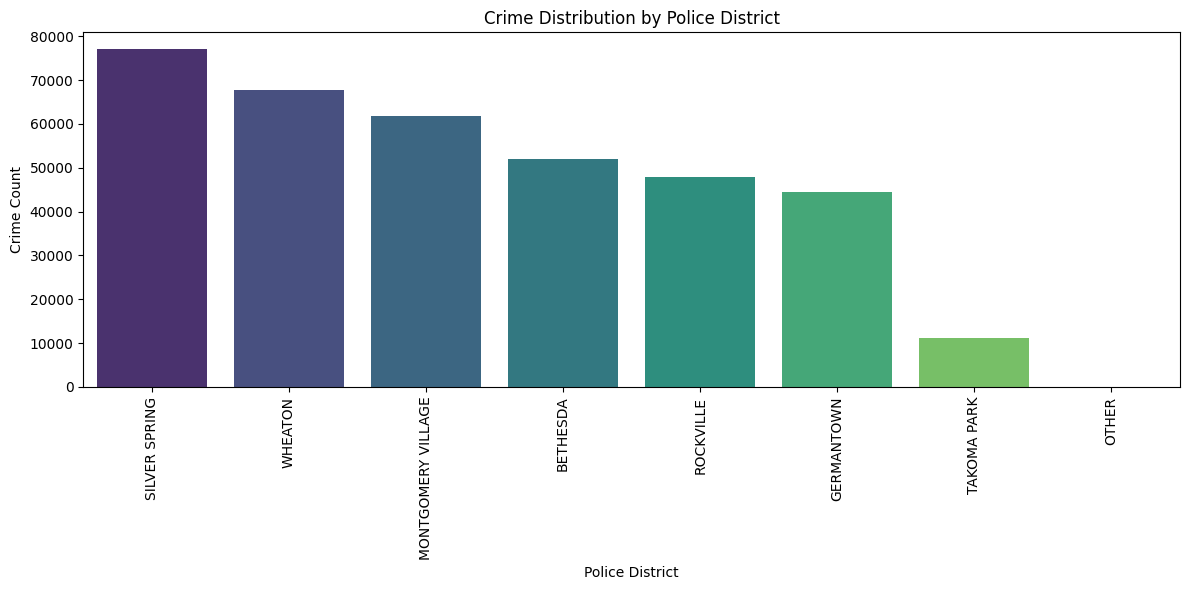

In [ ]:
# Create a bar plot to visualize crime count by police district
plt.figure(figsize=(12, 6))
sns.barplot(data=crime_by_district, x='policedistrictname', y='crime_count', palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Police District')
plt.ylabel('Crime Count')
plt.title('Crime Distribution by Police District')

plt.tight_layout()
plt.show()

<ipython-input-12-2a8130391964>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(crime_by_district['policedistrictname'], rotation=90)


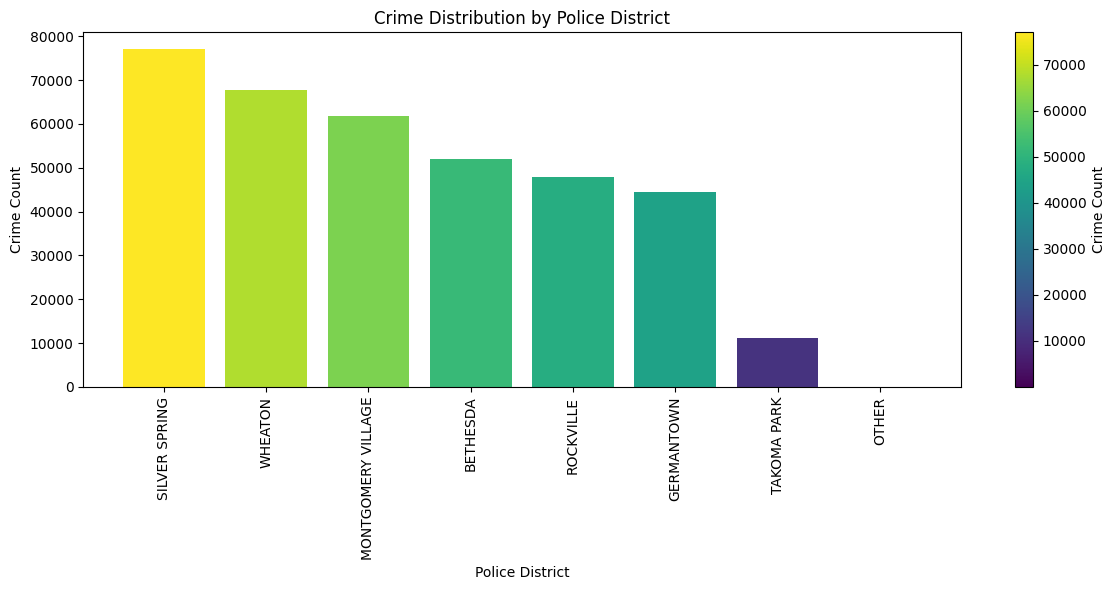

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Normalize the crime count for colormap
norm = plt.Normalize(crime_by_district['crime_count'].min(), crime_by_district['crime_count'].max())
colors = plt.cm.viridis(norm(crime_by_district['crime_count']))

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create bar plot on the axis
bars = ax.bar(
    crime_by_district['policedistrictname'],
    crime_by_district['crime_count'],
    color=colors
)

# Rotate x-axis labels
ax.set_xticklabels(crime_by_district['policedistrictname'], rotation=90)

# Add labels and title
ax.set_xlabel('Police District')
ax.set_ylabel('Crime Count')
ax.set_title('Crime Distribution by Police District')

# Add colorbar, anchored to the figure
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Crime Count')

plt.tight_layout()
plt.show()

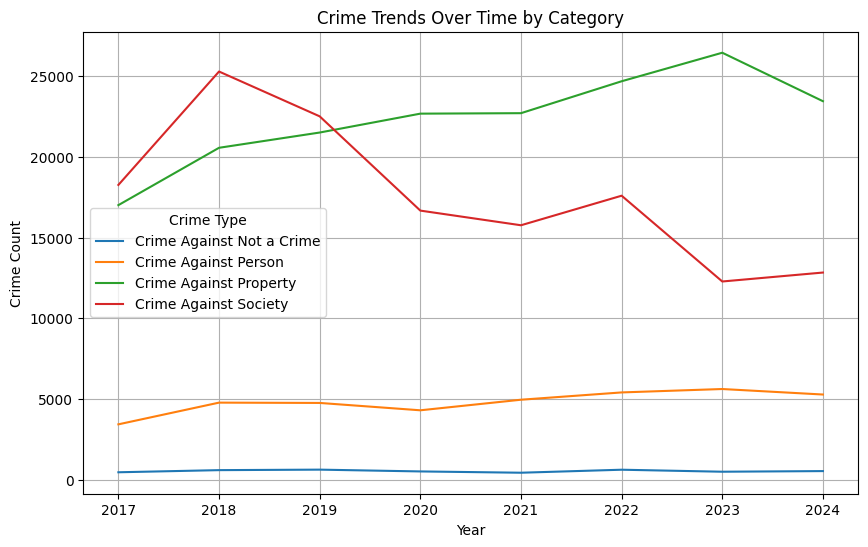

In [ ]:
import matplotlib.pyplot as plt

# Group by year and plot each category
crime_by_year = crime_df.groupby(['year', 'crimename1']).size().unstack()

crime_by_year.plot(kind='line', figsize=(10, 6))
plt.title('Crime Trends Over Time by Category')
plt.ylabel('Crime Count')
plt.xlabel('Year')
plt.legend(title='Crime Type')
plt.grid(True)
plt.show()

2020 saw a decline in Crime A, likely due to pandemic restrictions and shifts in urban activities. However, 2022 and 2023 experienced a rise in Crime Against Property rates, possibly indicating a post-pandemic recovery phase and increased economic strain that may have led to higher instances of property-related crimes.

Look for the top 10 cities with higher crime percentage

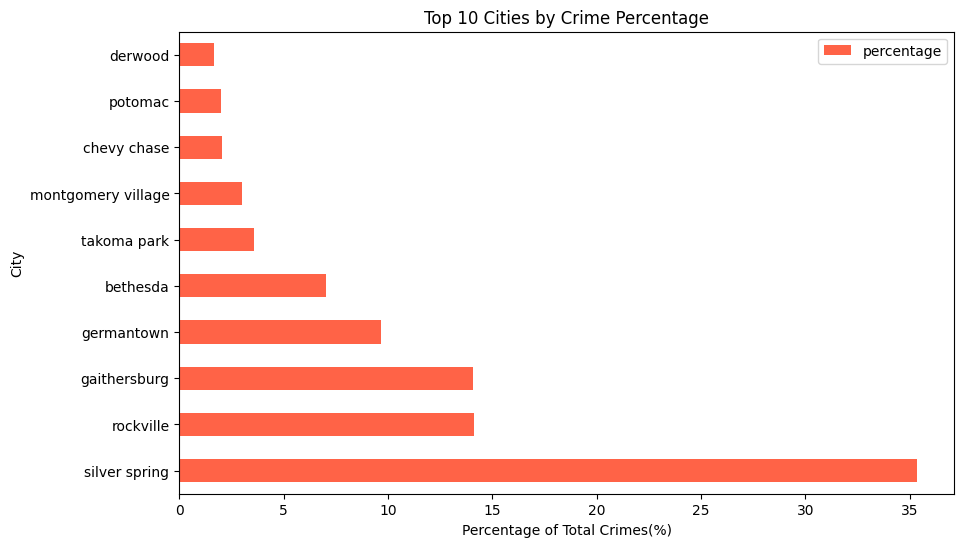

In [ ]:
# Count crimes per city
city_counts = crime_df.groupby('city').size().reset_index(name='count')

# Calculate the percentage for each city
total_crimes = city_counts['count'].sum()
city_counts['percentage'] = (city_counts['count'] / total_crimes) * 100

# Sort by percentage
city_counts_sorted = city_counts.sort_values('percentage', ascending=False)

# Plot the top 10 cities by crime percentage
city_counts_sorted.head(10).plot(
    x='city', y='percentage', kind='barh', figsize=(10, 6), color='tomato'
)
plt.xlabel('Percentage of Total Crimes(%)')
plt.ylabel('City')
plt.title('Top 10 Cities by Crime Percentage')
plt.show()

In [ ]:
# Import School_Info.csv
school_info_df = pd.read_csv(folder_path + 'School_Info.csv')

# Import Median_home_value_filtered.csv
median_home_value_df = pd.read_csv(folder_path + 'Median_home_value_filtered.csv')

# Check the first few rows of each
print("School_Info.csv:")
print(school_info_df.head())

print("\nMedian_home_value_filtered.csv:")
print(median_home_value_df.head())

School_Info.csv:
             category        schoolname                     address  \
0        HIGH SCHOOLS       Damascus HS              25921 Ridge Rd   
1  ELEMENTARY SCHOOLS    Clearspring ES               9930 Moyer Rd   
2  ELEMENTARY SCHOOLS       Sherwood ES  1401 Olney Sandy Spring Rd   
3  ELEMENTARY SCHOOLS     Pine Crest ES             201 Woodmoor Dr   
4      MIDDLE SCHOOLS  Earle B. Wood MS              14615 Bauer Dr   

            city  zipcode         phone  \
0       Damascus    20872  301-253-7030   
1       Damascus    20872  301-253-7004   
2   Sandy Spring    20860  301-924-3195   
3  Silver Spring    20901  301-649-8066   
4      Rockville    20852  301-460-2150   

                                                 url  longitude   latitude  \
0  http://www.montgomeryschoolsmd.org/schools/dam... -77.210020  39.282496   
1  http://www.montgomeryschoolsmd.org/schools/cle... -77.207301  39.265783   
2  http://www.montgomeryschoolsmd.org/schools/she... -77.033116

In [ ]:
# Make city names lowercase
school_info_df['city'] = school_info_df['city'].str.lower()
median_home_value_df['city'] = median_home_value_df['city'].str.lower()
print(school_info_df.head())

             category        schoolname                     address  \
0        HIGH SCHOOLS       Damascus HS              25921 Ridge Rd   
1  ELEMENTARY SCHOOLS    Clearspring ES               9930 Moyer Rd   
2  ELEMENTARY SCHOOLS       Sherwood ES  1401 Olney Sandy Spring Rd   
3  ELEMENTARY SCHOOLS     Pine Crest ES             201 Woodmoor Dr   
4      MIDDLE SCHOOLS  Earle B. Wood MS              14615 Bauer Dr   

            city  zipcode         phone  \
0       damascus    20872  301-253-7030   
1       damascus    20872  301-253-7004   
2   sandy spring    20860  301-924-3195   
3  silver spring    20901  301-649-8066   
4      rockville    20852  301-460-2150   

                                                 url  longitude   latitude  \
0  http://www.montgomeryschoolsmd.org/schools/dam... -77.210020  39.282496   
1  http://www.montgomeryschoolsmd.org/schools/cle... -77.207301  39.265783   
2  http://www.montgomeryschoolsmd.org/schools/she... -77.033116  39.149584   
3 

**Crime vs. Median Home Value**
Map the trends for Crime Against Property in high-value areas versus lower-value ones. Are there more property crimes in wealthy neighborhoods?

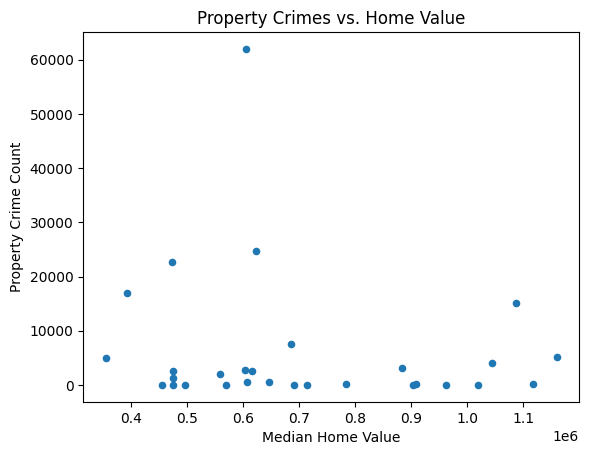

In [ ]:
# Example: Crime count by property crime type per city
property_crime_by_city = crime_df[crime_df['crimename1'] == 'Crime Against Property'].groupby('city').size()
property_crime_by_city = property_crime_by_city.sort_values(ascending=False)

# Merge with median home values
merged_data = property_crime_by_city.to_frame().merge(median_home_value_df, on='city')

# Visualize the relationship
merged_data.plot(kind='scatter', x='median_home_value', y=0, title="Property Crimes vs. Home Value", xlabel="Median Home Value", ylabel="Property Crime Count")
plt.show()

 There does not appear to be a clear or strong linear correlation between the two variables. While some cities with relatively lower median home values show high property crime counts, other cities with both low and high home values show low or moderate crime count

In [ ]:
from scipy.stats import ttest_ind

# Set a threshold for high vs low property crime (use median of property crimes)
crime_threshold = merged_data[0].median()  # Median property crime count

# Create groups: high crime and low crime
high_crime = merged_data[merged_data[0] > crime_threshold]
low_crime = merged_data[merged_data[0] <= crime_threshold]

# Perform t-test to compare median home values between high crime and low crime cities
t_stat, p_value = ttest_ind(high_crime['median_home_value'], low_crime['median_home_value'])

# Output the t-statistic and p-value
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -0.43187261837835067, P-value: 0.6692633347552701


Based on this analysis, there is no significant evidence to suggest that cities with higher property crime rates have significantly different median home values than cities with lower property crime rates.

In [ ]:
# Group crime data by 'crimename2' and 'city' to get the count of each crime type per city
crime_counts_by_type = crime_df.groupby(['city', 'crimename2']).size().reset_index(name='crime_count')

# Merge with the median home values
merged_crime_data = crime_counts_by_type.merge(median_home_value_df, on='city')

# Check the first few rows
merged_crime_data.head()

city                                crimename2  crime_count  \
0  aspen hill                        Aggravated Assault            1   
1  aspen hill                        All Other Offenses            2   
2  aspen hill                         All other Larceny            1   
3  aspen hill  Destruction/Damage/Vandalism of Property            1   
4  aspen hill               Driving Under the Influence            2   

   median_home_value  
0             495800  
1             495800  
2             495800  
3             495800  
4             495800

In [ ]:
from scipy.stats import ttest_ind

# Initialize a dictionary to store results
t_test_results = {}

# Perform t-test for each crime type
for crime_type in merged_crime_data['crimename2'].unique():
    # Filter data for the current crime type
    crime_data = merged_crime_data[merged_crime_data['crimename2'] == crime_type]

    # Split cities into high and low crime groups based on median crime count
    high_crime = crime_data[crime_data['crime_count'] > crime_data['crime_count'].median()]
    low_crime = crime_data[crime_data['crime_count'] <= crime_data['crime_count'].median()]

    # Perform t-test on median home values between high and low crime groups
    t_stat, p_val = ttest_ind(high_crime['median_home_value'], low_crime['median_home_value'])

    # Store results in the dictionary
    t_test_results[crime_type] = {'T-statistic': t_stat, 'P-value': p_val}

# Convert the results to a DataFrame for better visualization
t_test_results_df = pd.DataFrame(t_test_results).T
print(t_test_results_df)

                                             T-statistic   P-value
Aggravated Assault                             -1.429579  0.166886
All Other Offenses                             -0.121936  0.903853
All other Larceny                               0.395155  0.696370
Destruction/Damage/Vandalism of Property       -0.233427  0.817330
Driving Under the Influence                    -0.831318  0.413364
Shoplifting                                     1.291015  0.213979
Simple Assault                                 -1.156181  0.258537
Theft of Motor Vehicle Parts or Accessories    -0.110135  0.913301
Burglary/Breaking and Entering                 -0.156497  0.877210
Counterfeiting/Forgery                          0.084059  0.933845
Credit Card/Automatic Teller Machine Fraud     -0.495722  0.625007
Drug Equipment Violations                      -1.322757  0.201617
Drug/Narcotic Violations                       -0.810162  0.426524
Embezzlement                                    0.492212  0.62

/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


The t-tests were conducted to examine whether there are significant differences in median home values between cities with higher and lower counts of specific crime types. Most crime types did not show statistically significant relationships with median home values, as indicated by high p-values (p > 0.05). However, three crime types (Murder and Nonnegligent Manslaughter, Forcible Fondling, and Statuory Rape)showed significant differences (p < 0.05), suggesting that these serious crimes may have a stronger association with variations in home values across cities. These findings highlight the potential impact of certain violent crimes on housing markets and neighborhood perceptions.

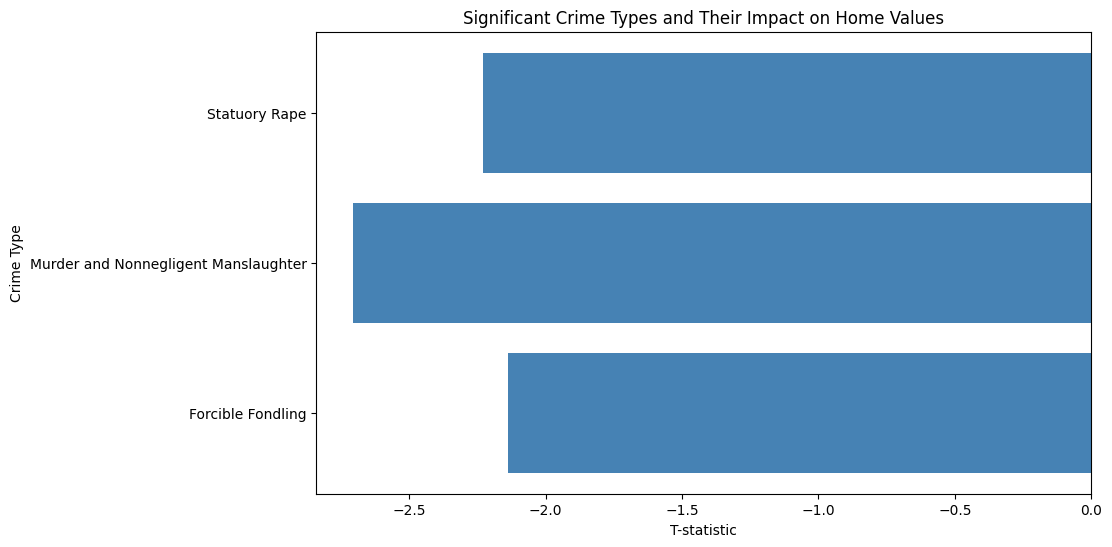

In [ ]:
import matplotlib.pyplot as plt

# Filter for significant crime types (p-value < 0.05)
significant_crimes = t_test_results_df[t_test_results_df['P-value'] < 0.05]

# Plot T-statistics for significant crime types
plt.figure(figsize=(10, 6))
plt.barh(significant_crimes.index, significant_crimes['T-statistic'], color='steelblue')
plt.xlabel('T-statistic')
plt.ylabel('Crime Type')
plt.title('Significant Crime Types and Their Impact on Home Values')
plt.show()

In [ ]:
# Pivot data: rows = city, columns = crime types, values = crime counts
pivot_data = merged_crime_data.pivot_table(
    index='city',
    columns='crimename2',
    values='crime_count',
    aggfunc='sum'
).reset_index()

# Merge in the median home value per city
pivot_data = pivot_data.merge(
    merged_crime_data[['city', 'median_home_value']].drop_duplicates(),
    on='city',
    how='left'
)

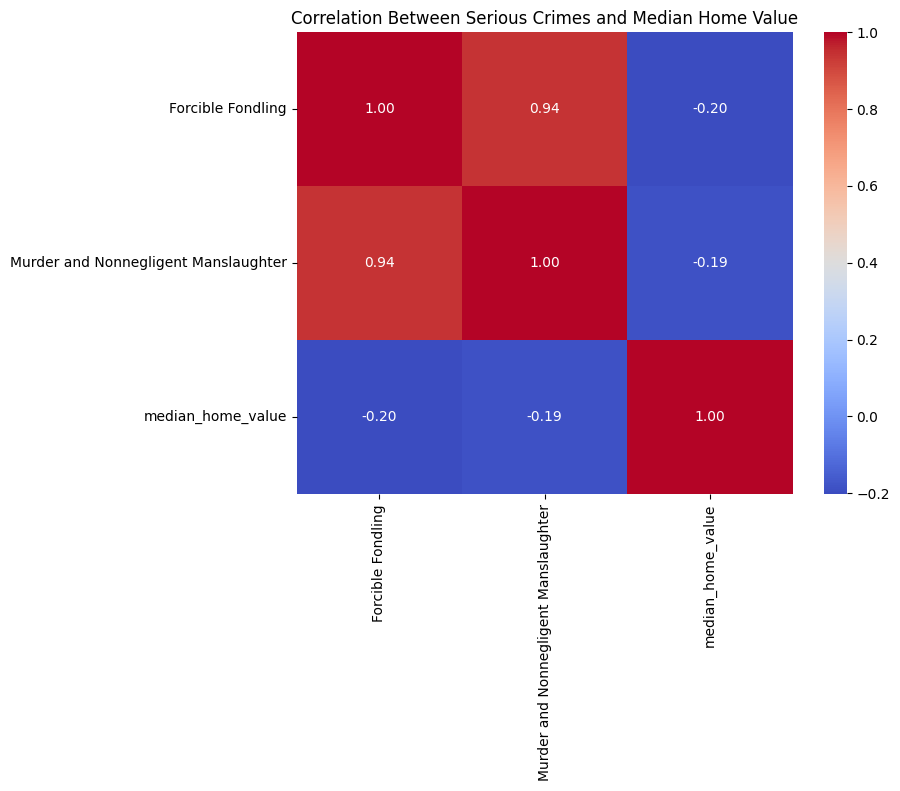

In [ ]:
# Step 1: Define the three significant crimes
selected_crimes = [
    'Murder and Nonnegligent Manslaughter',
    'Forcible Fondling',
    'Statutory Rape'
]

# Step 2: Filter data to only include those crimes
filtered_data = merged_crime_data[merged_crime_data['crimename2'].isin(selected_crimes)]

# Step 3: Pivot the table to have one column per crime type
pivot_data = filtered_data.pivot_table(
    index='city',
    columns='crimename2',
    values='crime_count',
    aggfunc='sum'
).reset_index()

# Step 4: Merge in the median home value per city
home_values = merged_crime_data[['city', 'median_home_value']].drop_duplicates()
pivot_data = pivot_data.merge(home_values, on='city', how='left')

# Step 5: Replace missing crime counts with 0
pivot_data = pivot_data.fillna(0)

# Step 6: Compute and plot correlation matrix (excluding 'city')
corr_matrix = pivot_data.drop(columns=['city']).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Serious Crimes and Median Home Value')
plt.show()

This heatmap shows a modest negative correlation between median home values and two serious crime types: Murder and Nonnegligent Manslaughter (–0.19) and Forcible Fondling (–0.20). This suggests that cities with higher rates of these crimes tend to have lower home values. The strong positive correlation (0.94) between the two crime types also indicates they often occur in the same areas. Overall, the heatmap supports earlier findings that serious violent crime may be linked to reduced property values.

While the negative relationship is not very strong, it points toward a possible social impact of violent crime on local housing markets.

<ipython-input-25-757617924a7b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=crime_data, x='crime_group', y='median_home_value', palette='Set2')


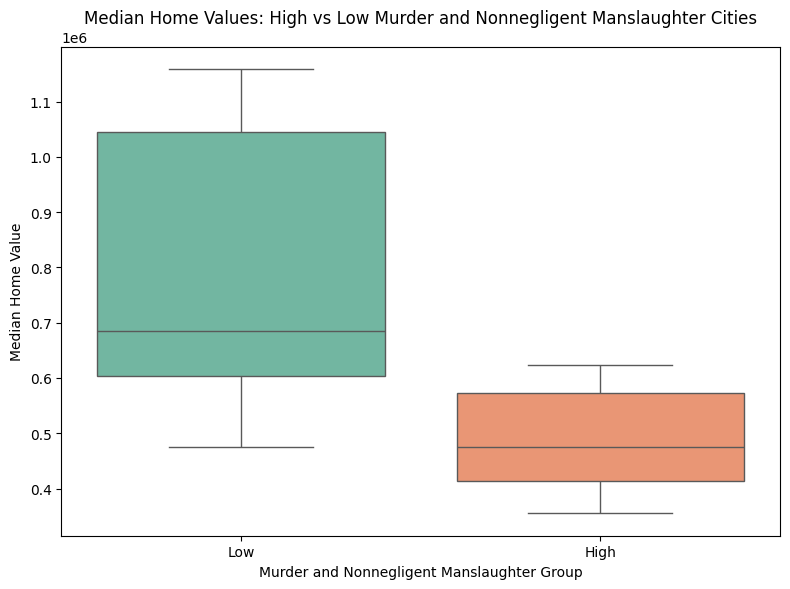

<ipython-input-25-757617924a7b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=crime_data, x='crime_group', y='median_home_value', palette='Set2')


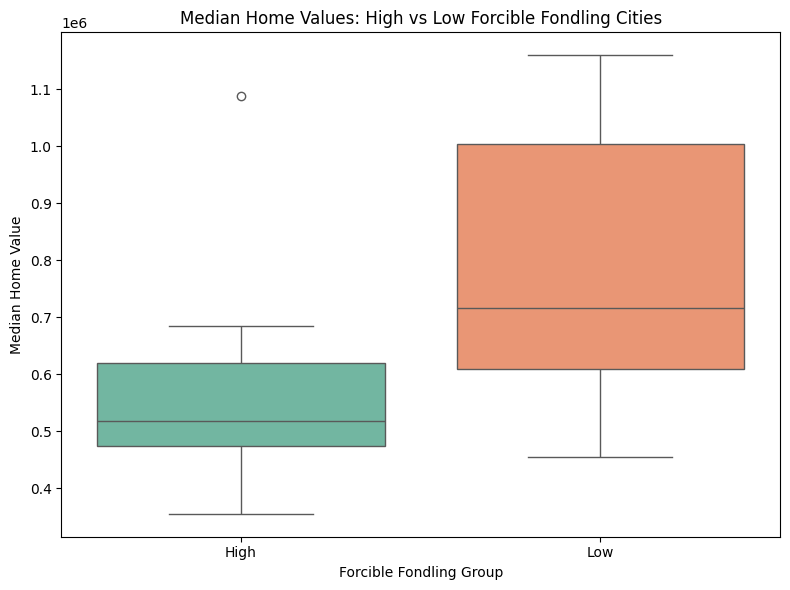

<ipython-input-25-757617924a7b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=crime_data, x='crime_group', y='median_home_value', palette='Set2')


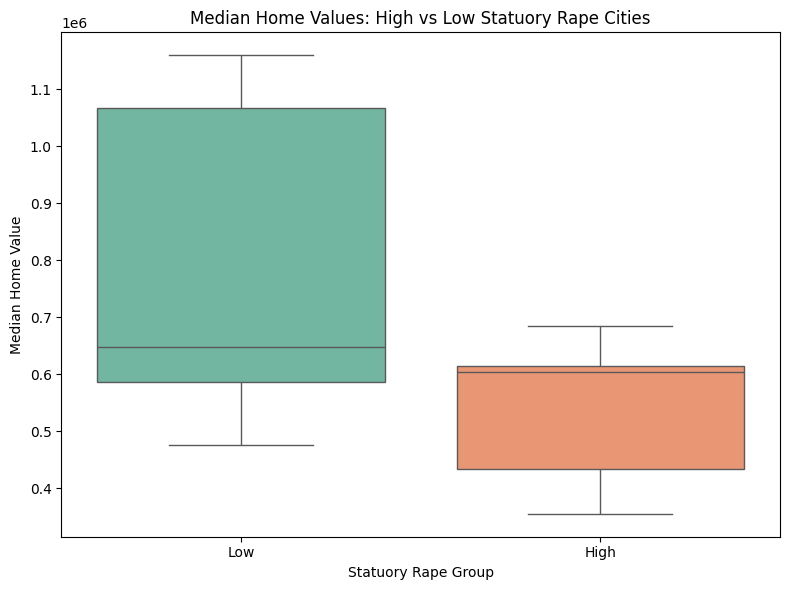

In [ ]:
# Loop through significant crimes
significant_crimes = ['Murder and Nonnegligent Manslaughter', 'Forcible Fondling', 'Statuory Rape']

for crime in significant_crimes:
    # Filter data
    crime_data = merged_crime_data[merged_crime_data['crimename2'] == crime].copy()

    # Create high/low group
    median_count = crime_data['crime_count'].median()
    crime_data['crime_group'] = crime_data['crime_count'].apply(lambda x: 'High' if x > median_count else 'Low')

    # Make boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=crime_data, x='crime_group', y='median_home_value', palette='Set2')
    plt.title(f'Median Home Values: High vs Low {crime} Cities')
    plt.xlabel(f'{crime} Group')
    plt.ylabel('Median Home Value')
    plt.tight_layout()
    plt.show()

In each case, cities with higher crime counts show noticeably lower median home values than cities with lower crime rates for that offense. This pattern is most clearly seen in the Murder and Manslaughter and Statutory Rape plots, where the median and overall distribution of home values in high crime cities are shifted downward. The Forcible Fondling plot shows a similar trend, though with some overlap in value ranges and visible outliers.

These visual results support the t-test findings and reinforce the idea that serious violent crimes may be linked to decreased property values, likely due to safety concerns and their influence on neighborhood desirability.

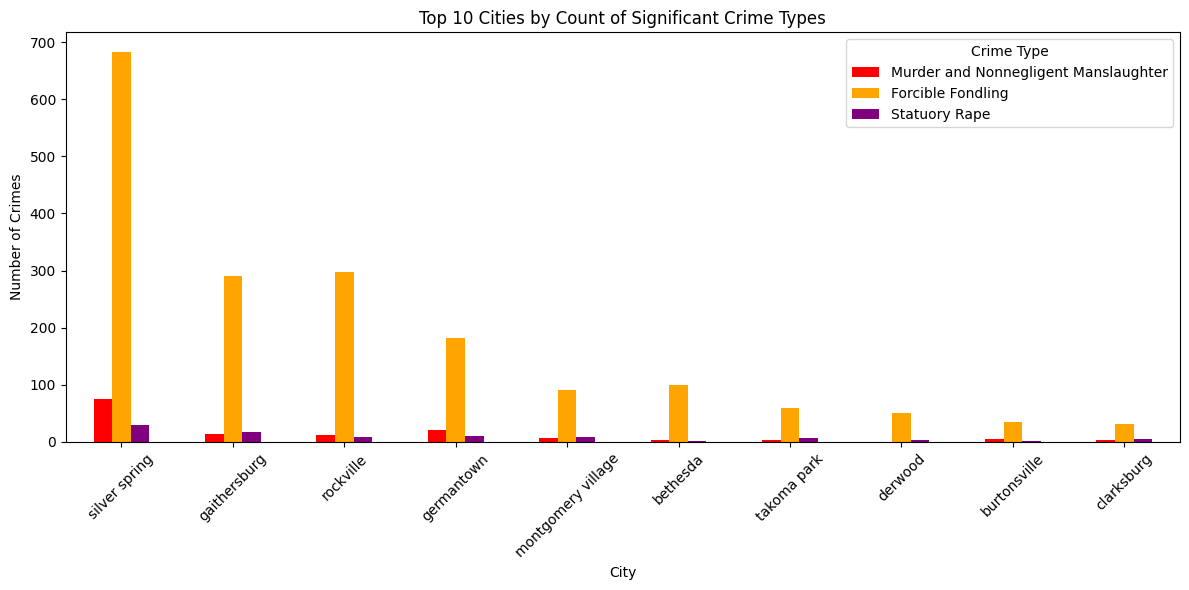

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for the three crimes
significant_crimes = ['Murder and Nonnegligent Manslaughter', 'Forcible Fondling', 'Statuory Rape']
filtered_df = crime_df[crime_df['crimename2'].isin(significant_crimes)]

# Count per city and crime
crime_counts = filtered_df.groupby(['city', 'crimename2']).size().reset_index(name='count')

# Pivot to wide format
crime_pivot = crime_counts.pivot(index='city', columns='crimename2', values='count').fillna(0)

# Make sure all three crimes are present as columns
for crime in significant_crimes:
    if crime not in crime_pivot.columns:
        crime_pivot[crime] = 0

# Calculate total across crimes
crime_pivot['total'] = crime_pivot[significant_crimes].sum(axis=1)

# Get top 10 cities by total
top_cities = crime_pivot.sort_values('total', ascending=False).head(10)

# Plot
ax = top_cities[significant_crimes].plot(kind='bar', figsize=(12, 6), color=['red', 'orange', 'purple'])

plt.xlabel('City')
plt.ylabel('Number of Crimes')
plt.title('Top 10 Cities by Count of Significant Crime Types')
plt.legend(title='Crime Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Crime Distribution by School Location**

Analyze if schools are located in areas with high crime rates

In [ ]:
import pandas as pd
from sklearn.neighbors import BallTree

# Convert latitude and longitude to radians
crime_coords = np.radians(crime_df[['latitude', 'longitude']])
school_coords = np.radians(school_info_df[['latitude', 'longitude']])

# Build BallTree using haversine distance
tree = BallTree(crime_coords, metric='haversine')

# Convert radius in miles to radians
radius_miles = 1
radius_radians = radius_miles / 3959  # Earth's radius in miles

# Count crimes within radius for each school
counts = tree.query_radius(school_coords, r=radius_radians, count_only=True)

# Add crime counts to DataFrame
school_info_df['nearby_crimes'] = counts

# Sort schools by number of nearby crimes
school_info_df_sorted = school_info_df.sort_values(by='nearby_crimes', ascending=False)

# Display top schools with city and crime count
import pandas as pd
from sklearn.neighbors import BallTree

# Convert latitude and longitude to radians
crime_coords = np.radians(crime_df[['latitude', 'longitude']])
school_coords = np.radians(school_info_df[['latitude', 'longitude']])

# Build BallTree using haversine distance
tree = BallTree(crime_coords, metric='haversine')

# Convert radius in miles to radians
radius_miles = 1
radius_radians = radius_miles / 3959  # Earth's radius in miles

# Count crimes within radius for each school
counts = tree.query_radius(school_coords, r=radius_radians, count_only=True)

# Add crime counts to DataFrame
school_info_df['nearby_crimes'] = counts

# Sort schools by number of nearby crimes
school_info_df_sorted = school_info_df.sort_values(by='nearby_crimes', ascending=False)

# Display top schools with city and crime count
import pandas as pd
from sklearn.neighbors import BallTree

# Convert latitude and longitude to radians
crime_coords = np.radians(crime_df[['latitude', 'longitude']])
school_coords = np.radians(school_info_df[['latitude', 'longitude']])

# Build BallTree using haversine distance
tree = BallTree(crime_coords, metric='haversine')

# Convert radius in miles to radians
radius_miles = 1
radius_radians = radius_miles / 3959  # Earth's radius in miles

# Count crimes within radius for each school
counts = tree.query_radius(school_coords, r=radius_radians, count_only=True)

# Add crime counts to DataFrame
school_info_df['nearby_crimes'] = counts

# Sort schools by number of nearby crimes
school_info_df_sorted = school_info_df.sort_values(by='nearby_crimes', ascending=False)

import pandas as pd
from sklearn.neighbors import BallTree

# Convert latitude and longitude to radians
crime_coords = np.radians(crime_df[['latitude', 'longitude']])
school_coords = np.radians(school_info_df[['latitude', 'longitude']])

# Build BallTree using haversine distance
tree = BallTree(crime_coords, metric='haversine')

# Convert radius in miles to radians
radius_miles = 1
radius_radians = radius_miles / 3959  # Earth's radius in miles

# Count crimes within radius for each school
counts = tree.query_radius(school_coords, r=radius_radians, count_only=True)

# Add crime counts to DataFrame
school_info_df['nearby_crimes'] = counts

# Sort schools by number of nearby crimes
school_info_df_sorted = school_info_df.sort_values(by='nearby_crimes', ascending=False)

# Display top schools with city and crime count
school_info_df_sorted[['schoolname', 'city', 'nearby_crimes']].head(10)

schoolname           city  nearby_crimes
117           East Silver Spring ES  silver spring          27934
188                  Sligo Creek ES  silver spring          23480
146  Silver Spring International MS  silver spring          23213
190                  Takoma Park MS    takoma park          21030
111                       Arcola ES  silver spring          18040
100                   Glen Haven ES  silver spring          17322
155                  Takoma Park ES    takoma park          16695
30                    South Lake ES   gaithersburg          15660
23               Oakland Terrace ES  silver spring          15537
141              Albert Einstein HS     kensington          15479

To explore how local crime may impact school environments, a spatial proximity analysis was conducted using the geographic coordinates of public schools and crime reports in Montgomery County. Using the haversine distance formula, the number of crimes within a 1-mile radius of each school was calculated. This method allowed for a meaningful comparison of how exposed different schools are to nearby criminal activity. The results revealed that several schools particularly those in the Silver Spring and Takoma Park areas—are situated in neighborhoods with a significantly higher concentration of crime. For example, East Silver Spring Elementary had over 27,000 incidents within a one-mile radius. While this analysis does not account for the time of day or type of crime, it highlights schools that may be located in higher risk environments, providing valuable context for discussions around safety and community investment.

In [ ]:
import folium
from folium.plugins import HeatMap

# Create base map
m = folium.Map(location=[39.1, -77.1], zoom_start=11)

# Add heatmap for crime density
crime_coords = crime_df[['latitude', 'longitude']].dropna().values.tolist()
HeatMap(crime_coords, radius=15, blur=10, min_opacity=0.3).add_to(m)

# Normalize crime count to control marker size
max_crimes = school_info_df['nearby_crimes'].max()
min_radius = 3
max_radius = 15

# Add school markers with dynamic radius
for _, row in school_info_df.iterrows():
    count = row['nearby_crimes']
    # Scale radius from min_radius to max_radius
    radius = min_radius + (max_radius - min_radius) * (count / max_crimes)
    popup_text = f"{row['schoolname']}<br>City: {row['city']}<br>Nearby Crimes: {count}"
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=radius,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.8,
        popup=popup_text
    ).add_to(m)

# Add color scale legend
legend_html = '''
<div style="position: fixed;
            bottom: 30px; left: 30px; width: 200px; height: 110px;
            background-color: white; z-index:9999; font-size:14px;
            border:2px solid grey; padding: 10px;">
    <b>Crime Density</b><br>
    <i style="background: blue; width: 18px; height: 18px; float: left; margin-right: 8px;"></i> Low<br>
    <i style="background: green; width: 18px; height: 18px; float: left; margin-right: 8px;"></i> Moderate<br>
    <i style="background: yellow; width: 18px; height: 18px; float: left; margin-right: 8px;"></i> High<br>
    <i style="background: red; width: 18px; height: 18px; float: left; margin-right: 8px;"></i> Very High
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# Show map
m

This interactive heatmap illustrates the distribution of crimes across Montgomery County, with warmer colors indicating areas of higher crime concentration. Overlaid on the heatmap are all public school locations, represented by blue circles. The size of each circle is scaled based on the number of crimes occurring within a one-mile radius of that school, providing a visual cue of crime exposure at each site. Schools in areas such as Silver Spring and Takoma Park stand out both in terms of proximity to crime hotspots and the volume of nearby incidents. This visualization reinforces earlier findings from the data table, offering a geographic perspective that highlights potential disparities in school environments and neighborhood safety.

In [ ]:
import folium

# Center map on the first school or a central location
map_center = [school_info_df_sorted['latitude'].mean(), school_info_df_sorted['longitude'].mean()]
crime_map = folium.Map(location=map_center, zoom_start=12)

# Add markers for schools with the highest nearby crimes
top_schools = school_info_df_sorted.head(10)

for idx, row in top_schools.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"School: {row['schoolname']}<br>Nearby Crimes: {row['nearby_crimes']}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(crime_map)

# Display the map
crime_map

# **Conclusion**
This analysis provided a multifaceted view of crime in Montgomery County, exploring how it varies across time, space, and community indicators like housing and education. Temporal trends revealed seasonal crime patterns, with peaks during warmer months and a notable decline during the COVID-19 pandemic years. Geographically, certain cities particularly Silver Spring, Wheaton, and Takoma Park—emerged as consistent crime hotspots. Statistical analysis showed that specific violent crimes, including murder and forcible fondling, are more closely associated with lower median home values, suggesting that not all crimes influence neighborhoods equally.

The spatial proximity analysis added a deeper layer by highlighting which public schools are most affected by nearby crime. Many of the top 10 most exposed schools were clustered in areas already known for high crime rates, reinforcing concerns about localized safety disparities. Visualizations, including heatmaps and scaled school markers, helped make these patterns more intuitive and accessible.

Overall, the findings emphasize that crime is not evenly distributed and can have measurable connections to both economic and social aspects of community life. These insights support the need for place based strategies that consider not just crime reduction, but also its broader impact on housing stability and school environments.